In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn import ?
# from sklearn.metrics import ?

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [2]:
data_df = pd.read_csv('titanic.csv')
data_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
y_data = data_df[['Survived']] # 한번만 묶으면 리스트화 됨
y_data.head(3)

,Survived
0,0
1,1
2,1


In [4]:
del data_df['Survived']
x_data = data_df.copy()  # 삭제한 다음에 카피를 통해서 새로운 객체에 저장함
x_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

In [5]:
x_data.info()

# X에 대한 데이터는 생존을 제외한 나머지 / Y는 생존 여부

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [6]:
x_data['Sex_clean'] = x_data['Sex'].astype('category').cat.codes
x_data[['Sex_clean']].head()

,Sex_clean
0,1
1,0
2,0
3,0
4,1


In [7]:
x_data['Family'] = 1 + x_data['SibSp'] + x_data['Parch']
# 나 자신 + 형제자매 + 부모

x_data[['Family']].head()

,Family
0,2
1,2
2,1
3,2
4,1


In [8]:
# 혼자 탔는지 다른 가족과 탔는지 여부 구분

x_data['Solo'] = (x_data['Family'] == 1)

x_data[['Solo']].head()

,Solo
0,False
1,False
2,True
3,False
4,True


In [9]:
x_data[['Pclass']].describe()

,Pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [10]:
# # 기본적인 결측치 채우는 방법
mean_age = x_data['Age'].median(skipna=True)
x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)


# Age 칼럼의 importance가 상당히 높게 나옴을 알 수 있고, 결측치가 많지만 Nan 값에 대한
# 처리는 나이의 Median 값으로 채워주는 전략이 가장 높은 점수 얻음

In [11]:
# Train
x_data.loc[ x_data['Age'] <= 10, 'Age_clean'] = 0
x_data.loc[(x_data['Age'] > 10) & (x_data['Age'] <= 16), 'Age_clean'] = 1
x_data.loc[(x_data['Age'] > 16) & (x_data['Age'] <= 20), 'Age_clean'] = 2
x_data.loc[(x_data['Age'] > 20) & (x_data['Age'] <= 26), 'Age_clean'] = 3
x_data.loc[(x_data['Age'] > 26) & (x_data['Age'] <= 30), 'Age_clean'] = 4
x_data.loc[(x_data['Age'] > 30) & (x_data['Age'] <= 36), 'Age_clean'] = 5
x_data.loc[(x_data['Age'] > 36) & (x_data['Age'] <= 40), 'Age_clean'] = 6
x_data.loc[(x_data['Age'] > 40) & (x_data['Age'] <= 46), 'Age_clean'] = 7
x_data.loc[(x_data['Age'] > 46) & (x_data['Age'] <= 50), 'Age_clean'] = 8
x_data.loc[(x_data['Age'] > 50) & (x_data['Age'] <= 60), 'Age_clean'] = 9
x_data.loc[ x_data['Age'] > 60, 'Age_clean'] = 10

In [12]:
x_data[['Age_clean']]

,Age_clean
0,3.0
1,6.0
2,3.0
3,5.0
4,5.0
5,4.0
6,9.0
7,0.0
8,4.0
9,1.0


<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [13]:
from sklearn import model_selection

#x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state=0)
# random_state (random_seed or seed) : make the result reproducible

In [14]:
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

In [37]:
feature = ['Pclass', 'SibSp', 'Parch', 'Sex_clean', 'Family', 'Solo', 'Age_clean']
label = ['Survived']

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

x = x_data[feature]
y = y_data[label]

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=0)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = RandomForestClassifier(n_estimators=50, max_depth=4,power random_state=0)
# n_estimators == 의사결정트리의 개수
cross_val_score(clf, x_train, y_train, cv=k_fold, scoring='accuracy', ).mean()
# Accuracy

0.8282642089093702

<br>

## 4. Train the model

In [39]:
clf.fit(x_train,y_train)
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.8362760834670947
0.8134328358208955


<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)

In [40]:
from sklearn.metrics import mean_squared_error, accuracy_score, roc_curve, auc

print('Accuracy: ', accuracy_score(clf.predict(x_test), y_test))

Accuracy:  0.8134328358208955


In [41]:
# ! pip install mglearn

훈련 세트 정확도 : 0.836
테스트 세트 정확도 : 0.813
특성 중요도 : 
[0.16710833 0.05051785 0.02346788 0.55763521 0.09779217 0.01759192
 0.08588663]


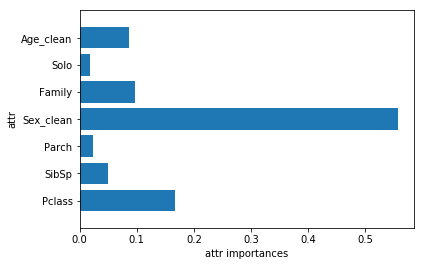

In [57]:
print("훈련 세트 정확도 : {:.3f}".format(clf.score(x_train,y_train)))

print("테스트 세트 정확도 : {:.3f}".format(clf.score(x_test,y_test)))

print("특성 중요도 : \n{}".format(clf.feature_importances_))




def plot_feature_importances_clf(model):

    n_features = 7
    #print(n_features)
    plt.barh(range(n_features), model.feature_importances_)
    
    
    plt.yticks(np.arange(n_features), x.columns)

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

plt.show()
plot_feature_importances_clf(clf)


In [61]:
from sklearn.metrics import roc_curve, auc

pred_test = clf.predict_proba(x_test) # Predict 'probability'
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

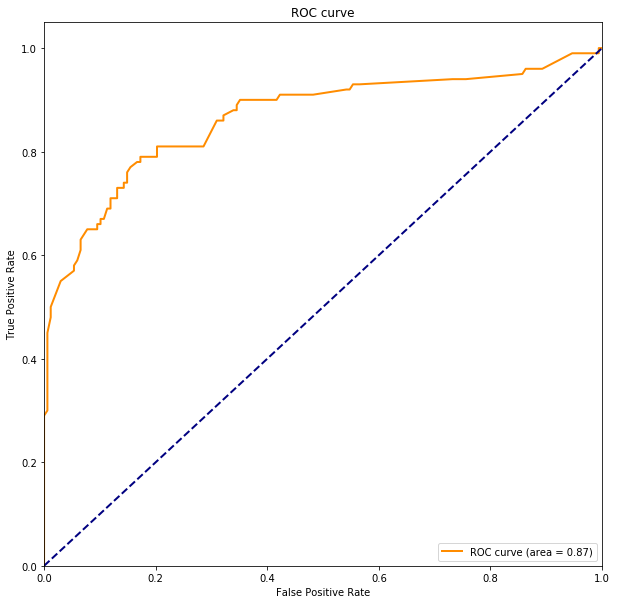

In [62]:
plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()